# Оптимизация маркетинговых затрат: куда и сколько вкладывать

Структура работы будет выглядеть следующим образом: этапы => шаги.
___
##### Этап I. Изучение общей информации:
* [Шаг 1. Загрузка библиотек](#1-bullet)
* [Шаг 2. Изучение файлов с данными, получение общей информации](#2-bullet)

##### Этап II. Предобработка данных:
* [Шаг 1. Замена типа данных](#3-bullet)
* [Шаг 2. Поиск и обработка дубликатов, ошибок в данных](#4-bullet)

##### Этап III. Продукт:
* [Шаг 1. Оценка пользовательской активности](#5-bullet)
* [Шаг 2. Пользовательская сессия](#6-bullet)
* [Шаг 3. Retention Rate](#7-bullet)

##### Этап IV. Продажи:
* [Шаг 1. Когда и сколько раз покупают за период](#8-bullet)
* [Шаг 2. LTV](#9-bullet)

##### Этап V. Маркетинг:
* [Шаг 1. Сколько денег потратили всего / на каждый источник / по времени](#10-bullet)
* [Шаг 2. CAC, ROI](#11-bullet)

[Общий вывод](#12-bullet)

## Этап I

### Шаг 1. Загрузка библиотек <a id='1-bullet'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Шаг 2. Изучение файлов с данными, получение общей информации  <a id='2-bullet'></a>

In [2]:
# Загружаем дынные:
visits = pd.read_csv(r'C:\Users\79518\Downloads\visits_log.csv')
orders = pd.read_csv(r'C:\Users\79518\Downloads\orders_log.csv')
costs = pd.read_csv(r'C:\Users\79518\Downloads\costs.csv')

# Выведем на экран таблицы:
display(visits.sample(10), orders.sample(10), costs.sample(10))

,Device,End Ts,Source Id,Start Ts,Uid
212772,touch,2017-12-01 14:41:00,2,2017-12-01 14:26:00,17775287871907245995
317296,touch,2017-11-29 22:40:00,2,2017-11-29 22:37:00,7272148457968941306
125251,touch,2018-01-09 13:55:00,4,2018-01-09 13:53:00,4617709243204962340
223395,desktop,2017-10-13 21:21:00,4,2017-10-13 21:09:00,9693975654909582834
344489,desktop,2017-09-11 09:36:00,5,2017-09-11 09:33:00,4557748757735832427
342944,desktop,2017-11-22 04:58:00,4,2017-11-22 04:52:00,11595080626882946547
277972,touch,2018-01-08 00:14:00,3,2018-01-07 23:58:00,15555145124945127451
325876,touch,2018-02-09 20:25:00,4,2018-02-09 20:23:00,455635129222191512
205146,desktop,2017-07-02 13:04:00,1,2017-07-02 12:44:00,2318716845659031358
14068,desktop,2017-09-08 00:49:00,1,2017-09-08 00:45:00,6883420863018621060


,Buy Ts,Revenue,Uid
24906,2017-12-19 14:57:00,3.30,12717252375480203215
13078,2017-10-16 17:21:00,16.80,2975345629141799441
35422,2018-02-17 19:34:00,3.42,11462275161711149283
26173,2017-12-26 14:33:00,10.55,13208740152820875814
47935,2018-05-18 21:04:00,0.92,16121161855497076262
47213,2018-05-14 11:57:00,1.83,301588078043868295
20037,2017-11-25 14:38:00,1.07,12751771867271018008
24686,2017-12-18 11:03:00,1.59,15744617530116907554
110,2017-06-02 10:04:00,4.64,10356483959216554207
25582,2017-12-23 14:32:00,4.28,8218647894092731011


,source_id,dt,costs
1918,9,2017-09-11,8.70
2284,10,2017-09-14,19.96
377,2,2017-06-15,72.09
716,2,2018-05-22,103.77
1937,9,2017-09-30,19.92
1820,9,2017-06-05,15.30
443,2,2017-08-20,50.96
777,3,2017-07-22,182.17
1267,4,2017-11-26,58.15
1803,5,2018-05-19,112.57


In [3]:
# Выведем общую информацию о данных на экран:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

##### Вывод

Три таблицы:

Первая - это visits, где:
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь
___
Вторая - это orders, где:
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа
___
Третья - это costs, где:
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день
___
В таблице присутствуют следующие dtypes:
- float64
- object
- int64
- uint64
___
Пропусков в таблицах нет.

## Этап II

### Шаг 1. Замена типа данных <a id='3-bullet'></a>

Распишем где, что и на что нужно поменять тип данных в разрезе каждой таблицы:

- visits. Заменим тип данных в столбцах End Ts и Start Ts на datetime64
- orders. Заменим тип данных в столбце Buy Ts на datetime64
- costs. Заменим тип данных в столбце dt на datetime64

In [4]:
# Приведем в порядок названия столбцов рассматриваемых таблиц:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
costs.columns = ['source_id', 'dt', 'costs']

# Меняем тип данных:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y.%m.%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y.%m.%d %H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y.%m.%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y.%m.%d')

### Шаг 2. Поиск и обработка дубликатов, ошибок в данных <a id='4-bullet'></a>

In [5]:
# Найдём количество дубликатов (одинаковых строк) в датафреймах, применив поочередно методы duplicated() и sum():
display(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0

0

0

##### Вывод

## Этап III

### Шаг 1. Оценка пользовательской активности <a id='5-bullet'></a>

In [6]:
# Добавим в датафрейм visits колонки date, week, month, year:
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year

# Найдем dau, wau, mau:
dau_visits = visits.groupby('date').agg({'uid':'nunique'}).mean()
wau_visits = visits.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()
mau_visits = visits.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()

# Выведем на экран рез-ты:
print('Количество уникальных пользователей в день:', int(dau_visits))
print('Количество уникальных пользователей в неделю:', int(wau_visits))
print('Количество уникальных пользователей в месяц:', int(mau_visits))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


In [7]:
# Посчитаем sticky factor:
sticky_factor = dau_visits / mau_visits * 100
print(sticky_factor)

uid    3.90897
dtype: float64


Вероятность того, что новый привлеченный пользователь останется в продукте составила 3.9%.
___
Изучим данные пользовательской активности в разрезе device.

In [8]:
# Сначала для desktop:
visits_desktop = visits.query('device=="desktop"')
dau_visits_desktop = visits_desktop.groupby('date').agg({'uid':'nunique'}).mean()
wau_visits_desktop = visits_desktop.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()
mau_visits_desktop = visits_desktop.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()

# Выведем на экран рез-ты:
print('Количество уникальных пользователей в день по desktop:', int(dau_visits_desktop))
print('Количество уникальных пользователей в неделю по desktop:', int(wau_visits_desktop))
print('Количество уникальных пользователей в месяц по desktop:', int(mau_visits_desktop))

Количество уникальных пользователей в день по desktop: 659
Количество уникальных пользователей в неделю по desktop: 4129
Количество уникальных пользователей в месяц по desktop: 16724


In [9]:
# Посчитаем sticky factor:
sticky_factor_desktop = dau_visits_desktop / mau_visits_desktop * 100
print(sticky_factor_desktop)

uid    3.941691
dtype: float64


In [10]:
# Теперь для touch:
visits_touch = visits.query('device=="touch"')
dau_visits_touch = visits_touch.groupby('date').agg({'uid':'nunique'}).mean()
wau_visits_touch = visits_touch.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()
mau_visits_touch = visits_touch.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()

# Выведем на экран рез-ты:
print('Количество уникальных пользователей в день по touch:', int(dau_visits_touch))
print('Количество уникальных пользователей в неделю по touch:', int(wau_visits_touch))
print('Количество уникальных пользователей в месяц по touch:', int(mau_visits_touch))

Количество уникальных пользователей в день по touch: 252
Количество уникальных пользователей в неделю по touch: 1634
Количество уникальных пользователей в месяц по touch: 6825


In [11]:
sticky_factor_touch = dau_visits_touch / mau_visits_touch * 100
print(sticky_factor_touch)

uid    3.704605
dtype: float64


Расчёты показали, что уникальных пользователей больше приходит с desktop. Можно заметить, что сумма уникальных пользователей по touch и desktop неравна тому количеству, что мы нашли рассчитывая общие показатели. Например в разрезе day: 252+659 != 907, это связано с округлением результатов. Также отметим, что кол-во уникальных пользователей по touch мы могли найти как разность между общим значением и значением по desktop. Sticky_factors_desktop > sticky_factors_touch пусть и незначительно, это значит что пользователей, пришедших с desktop, сервис удерживает и цепляет лучше.

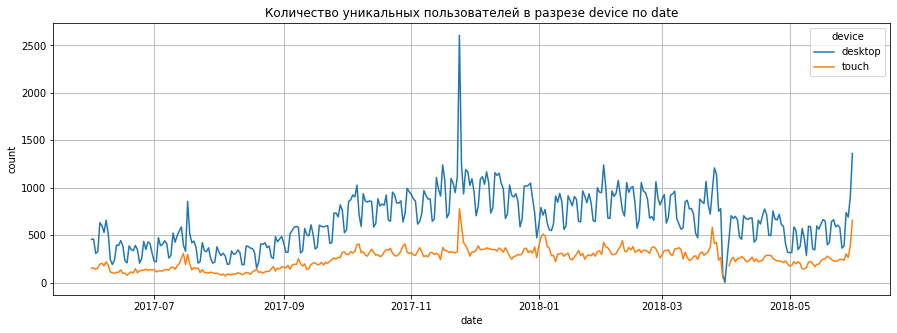

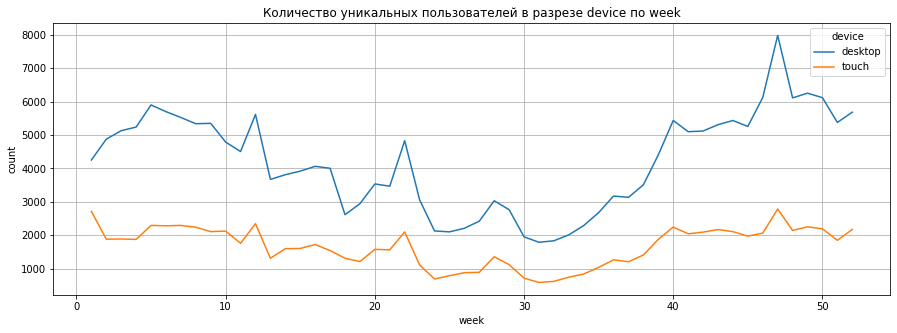

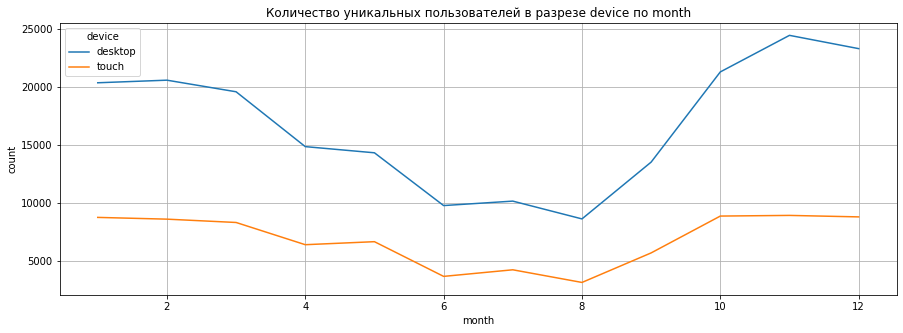

In [12]:
# Построим графики для наглядности:
visits.pivot_table(index='date', columns='device', values='uid', aggfunc='nunique').plot(figsize=(15,5), grid=True)
plt.title('Количество уникальных пользователей в разрезе device по date')
plt.ylabel('count')
visits.pivot_table(index='week', columns='device', values='uid', aggfunc='nunique').plot(figsize=(15,5), grid=True)
plt.title('Количество уникальных пользователей в разрезе device по week')
plt.ylabel('count')
visits.pivot_table(index='month', columns='device', values='uid', aggfunc='nunique').plot(figsize=(15,5), grid=True)
plt.title('Количество уникальных пользователей в разрезе device по month')
plt.ylabel('count')
plt.show();

Графики еще раз подтверждают то, что с desktop пользователей приходит больше. device и touch находятся в прямо пропорциональной зависимости судя по графикам в разрезе month и week. В разрезе по day такую ситуацию мы не наблюдаем - не всегда уменьшение пользователей с desktop ведет к уменьшению пользователей с touch. Отметим снижение числа пользователей с 4 месяца по 8-ой, а затем заметный рост пользователей с 10-го месяца. 

В разрезе source id не будем считать числовые значения dau, wau, mau - довольно трудоёмко, хотя это можно сделать с помощью цикла. Нам важно узнать через какие рекламные источники приходит больше уникальных пользователей, а для этого построим графики в разрезе source id по day, week, month.

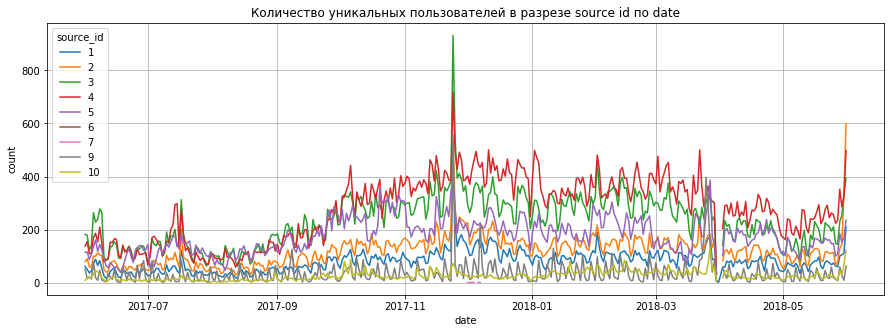

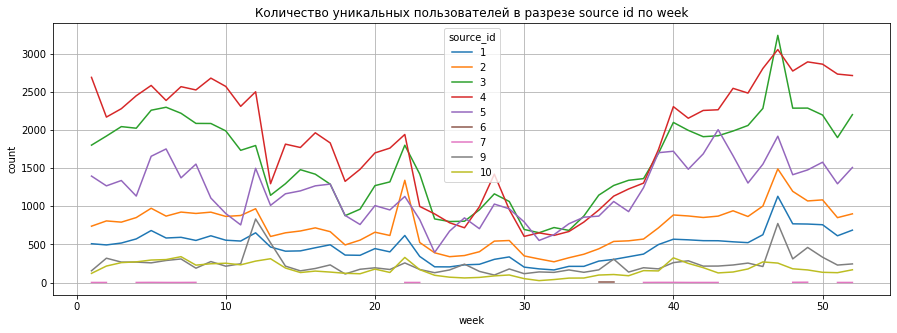

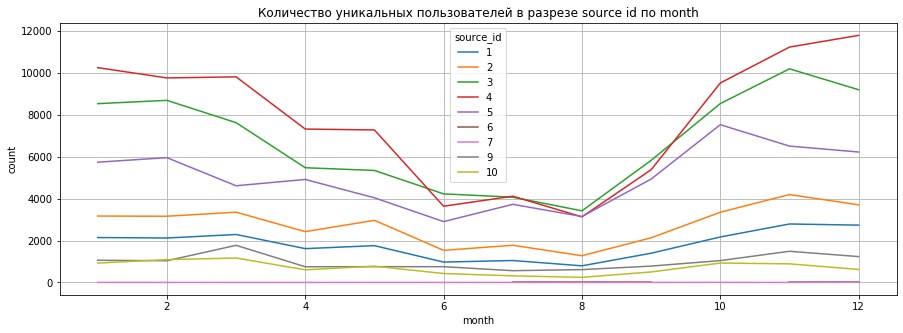

In [13]:
# Построим графики в разрезе source id для dau, wau, mau:
visits.pivot_table(index='date', columns='source_id', values='uid', aggfunc='nunique').plot(figsize=(15,5), grid=True)
plt.title('Количество уникальных пользователей в разрезе source id по date')
plt.ylabel('count')
visits.pivot_table(index='week', columns='source_id', values='uid', aggfunc='nunique').plot(figsize=(15,5), grid=True)
plt.title('Количество уникальных пользователей в разрезе source id по week')
plt.ylabel('count')
visits.pivot_table(index='month', columns='source_id', values='uid', aggfunc='nunique').plot(figsize=(15,5), grid=True)
plt.title('Количество уникальных пользователей в разрезе source id по month')
plt.ylabel('count')
plt.show();

Построенные графики позволили выделить топ-3 source id: это 4, 3, 5. Аутсайдеры: 7, 10, 9. В разрезе source id также отметим, что кол-во привлеченных пользователей растет по всем источникам начиная примерно с 8 месяца, а с 4 по 8 месяц число пользователей снижается.

### Шаг 2. Пользовательская сессия <a id='6-bullet'></a>

In [14]:
# Найдем количество сессий в день:
sessions_per_user = visits.groupby('date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print('Количество сессий в день:', sessions_per_user.mean()[2]) 

Количество сессий в день: 1.0821696440039723


In [15]:
# Найдем среднюю продолжительность сессии (asl):
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


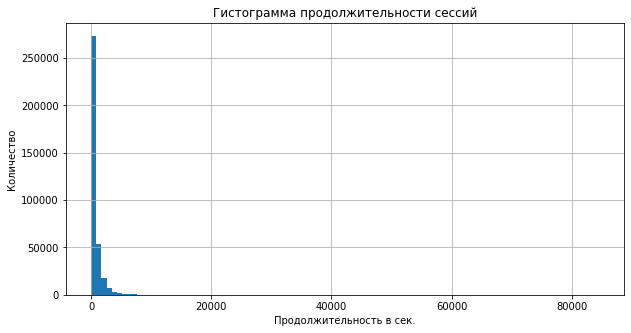

In [16]:
# Обязательно проверим распределение с которым имеем дело:
visits['session_duration_sec'].hist(bins=100, figsize = (10, 5))
plt.title('Гистограмма продолжительности сессий')
plt.xlabel('Продолжительность в сек.')
plt.ylabel('Количество');

In [17]:
# Распределение ненормальное, поэтому asl будем рассчитывать с помощью моды:
asl1 = visits['session_duration_sec'].mode()
print('Длительность одной сессии:', asl1)

Длительность одной сессии: 0    60
dtype: int64


Мода - мультимодальна, что ещё раз говорит о том, что данные не подчиняются нормальному распределению. В нашем случае, как мне кажется, моду как среднюю величину использовать не совсем логично, т.к. её зачастую используют для выявления часто повторяющихся нечисловых признаков, например, узнать какой товар люди чаще покупают в супермаркете "У дома". В нашем случае будем использовать медиану (выбираем именно ее плюс из-за того, что она устойчива к выбросам)

In [18]:
asl = visits['session_duration_sec'].median()
print('Длительность одной сессии:', asl)

Длительность одной сессии: 300.0


In [19]:
# Найдём кол-во сессий в день в разрезе device. Сначала для desktop:
sessions_per_user_desktop = visits_desktop.groupby('date').agg({'uid': ['count','nunique']})
sessions_per_user_desktop.columns = ['n_sessions', 'n_users']
sessions_per_user_desktop['sessions_per_user'] = sessions_per_user_desktop['n_sessions'] / sessions_per_user_desktop['n_users']
print('Количество сессий в день:', sessions_per_user_desktop.mean()[2])

Количество сессий в день: 1.088955311524761


In [20]:
# Теперь для touch:
sessions_per_user_touch = visits_touch.groupby('date').agg({'uid': ['count','nunique']})
sessions_per_user_touch.columns = ['n_sessions', 'n_users']
sessions_per_user_touch['sessions_per_user'] = sessions_per_user_touch['n_sessions'] / sessions_per_user_touch['n_users']
print('Количество сессий в день:', sessions_per_user_touch.mean()[2])

Количество сессий в день: 1.051071574166503


В день один пользователь в среднем проводит в приложении максимум 1 сессию как через desktop, так и через touch. Не сказать, что сервис используется регулярно.

In [21]:
# Сравним среднюю длительность одной сессии в разрезе device:
visits_desktop_session = visits.query('device=="desktop"')
visits_touch_session = visits.query('device=="touch"')
asl_desktop = visits_desktop_session['session_duration_sec'].median()
asl_touch = visits_touch_session['session_duration_sec'].median()
print('desktop:', asl_desktop)
print('touch:', asl_touch)

desktop: 360.0
touch: 180.0


Хм, средняя продолжительность сессии на desktop в два раза выше, чем на touch. Вполне возможно, что на desktop пользоваться сервисом удобнее или web-версия сервиса не столь интуитивно понятна пользователю, что приходиться тратить времени больше.

По source id посчитаем количество сессий и кол-во уникальных пользователей по каждому, найдем сколько в среднем сессий провёл 1 пользователь с каждого ресурса за всё время.

In [22]:
# кол-во сессий 1 юзера каждого источника
sessions_per_user_source = visits.groupby('source_id').agg({'uid': ['count','nunique']})
sessions_per_user_source.columns = ['n_sessions', 'n_users']
sessions_per_user_source['sessions_per_user_source'] = sessions_per_user_source['n_sessions'] / sessions_per_user_source['n_users']
sessions_per_user_source.sort_values(by='sessions_per_user_source', ascending=False)

,n_sessions,n_users,sessions_per_user_source
source_id,,,
2,47626,26245,1.814669
1,34121,18999,1.795937
9,13277,9264,1.433182
10,10025,8067,1.242717
4,101794,83525,1.218725
5,66905,56974,1.174308
3,85610,74756,1.145192
7,36,34,1.058824
6,6,6,1.000000


In [23]:
# Найдем среднюю длительность сессии по ресурсам за всё время:
asl_source = visits.groupby('source_id').agg({'session_duration_sec':'median'})
asl_source.sort_values(by='session_duration_sec', ascending=False)

,session_duration_sec
source_id,
1,600
2,420
6,420
10,300
3,240
4,240
5,240
9,240
7,180


Пользователи, которые зашли на сервис через 2,1,9 источники, заходили повторно чаще остальных. Дольше всех сессия длится у юзеров пришедших с 1 источника - 600 сек, меньше всего с 7-го.

### Шаг 3. Retention Rate <a id='7-bullet'></a>

In [24]:
# Разберемся с тем, насколько часто люди возвращаются к сервису.
# Для каждого uid найдем дату, когда он первый раз воспользовался сервисом:
first_activity_date = visits.groupby('uid')['date'].min()
# Заменим имя date на first date:
first_activity_date.name = 'first_date'
# Объединим visits и first_activity_date:
visits_join = visits.join(first_activity_date, on='uid')
# Создадим когорты и посчитаем кол-во уникальных пользователей в каждой:
visits_join['first_visit_month'] = visits_join['first_date'].astype('datetime64[M]')
visits_join['visit_month'] = visits_join['date'].astype('datetime64[M]')
visits_join['cohort_lifetime'] = visits_join['visit_month'] - visits_join['first_visit_month']
visits_join['cohort_lifetime'] = visits_join['cohort_lifetime'] / np.timedelta64(1,'M')
visits_join['cohort_lifetime'] = visits_join['cohort_lifetime'].round().astype('int')
cohorts = visits_join.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# Выведем на экран
cohorts

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [25]:
# Найдём исходное количество пользователей в когорте:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
# Выведем на экран:
initial_users_count

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


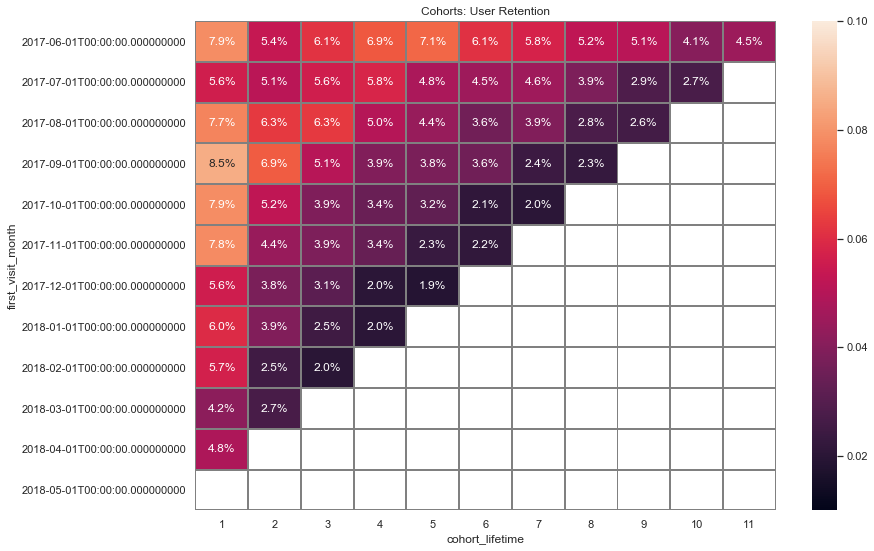

In [26]:
# Переименуем столбец uid в cohort users:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
# Считаем RR:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
# Построим сводную таблицу:
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
# Создадим тепловую карту:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.drop(columns=[0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0.01, vmax=0.1);

RR убывает в первый месяц по когортам с течением времени. В целом коэффициент удержания невысок, макс. значение по всем когортам 8.5 %. Следует отметить довольно интересное поведение пользователей июньской когорты: после небольшого спада во 2 lifetime, к 5 RR вырос до 7.1%. 

In [27]:
# Найдём RR для desktop:
df_desktop = visits_join.query('device=="desktop"')
cohorts_desktop = df_desktop.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# Выведем на экран
cohorts_desktop

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,9761
1,2017-06-01,1,833
2,2017-06-01,2,593
3,2017-06-01,3,671
4,2017-06-01,4,741
...,...,...,...
73,2018-03-01,1,627
74,2018-03-01,2,390
75,2018-04-01,0,10837
76,2018-04-01,1,553


In [28]:
# Найдём исходное количество пользователей в когорте:
initial_users_count_desktop = cohorts_desktop[cohorts_desktop['cohort_lifetime'] == 0][['first_visit_month','uid']]
# Выведем на экран:
initial_users_count_desktop

,first_visit_month,uid
0,2017-06-01,9761
12,2017-07-01,9312
23,2017-08-01,7450
33,2017-09-01,11715
42,2017-10-01,18451
50,2017-11-01,20129
57,2017-12-01,18460
63,2018-01-01,15809
68,2018-02-01,15586
72,2018-03-01,14412


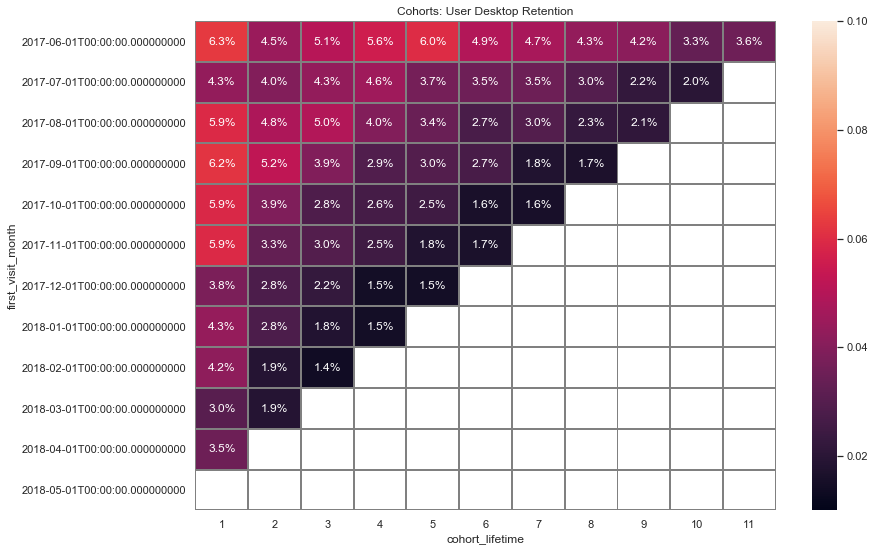

In [29]:
# Переименуем столбец uid в cohort users:
initial_users_count_desktop = initial_users_count_desktop.rename(columns={'uid':'cohort_users'})
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts_desktop = cohorts_desktop.merge(initial_users_count,on='first_visit_month')
# Считаем RR:
cohorts_desktop['retention'] = cohorts_desktop['uid']/cohorts_desktop['cohort_users']
# Построим сводную таблицу:
retention_pivot_desktop = cohorts_desktop.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
# Создадим тепловую карту:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Desktop Retention')
sns.heatmap(retention_pivot_desktop.drop(columns=[0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0.01, vmax=0.1);

Картина по RR для desktop совпадает с RR в общем.

In [30]:
# RR для touch:
df_touch = visits_join.query('device=="touch"')
cohorts_touch = df_touch.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# Выведем на экран
cohorts_touch

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,3655
1,2017-06-01,1,241
2,2017-06-01,2,145
3,2017-06-01,3,173
4,2017-06-01,4,214
...,...,...,...
73,2018-03-01,1,253
74,2018-03-01,2,174
75,2018-04-01,0,4991
76,2018-04-01,1,220


In [31]:
# Найдём исходное количество пользователей в когорте:
initial_users_count_touch = cohorts_touch[cohorts_touch['cohort_lifetime'] == 0][['first_visit_month','uid']]
# Выведем на экран:
initial_users_count_touch

,first_visit_month,uid
0,2017-06-01,3655
12,2017-07-01,3982
23,2017-08-01,2796
33,2017-09-01,5133
42,2017-10-01,7850
50,2017-11-01,7473
57,2017-12-01,7100
63,2018-01-01,7018
68,2018-02-01,6826
72,2018-03-01,6381


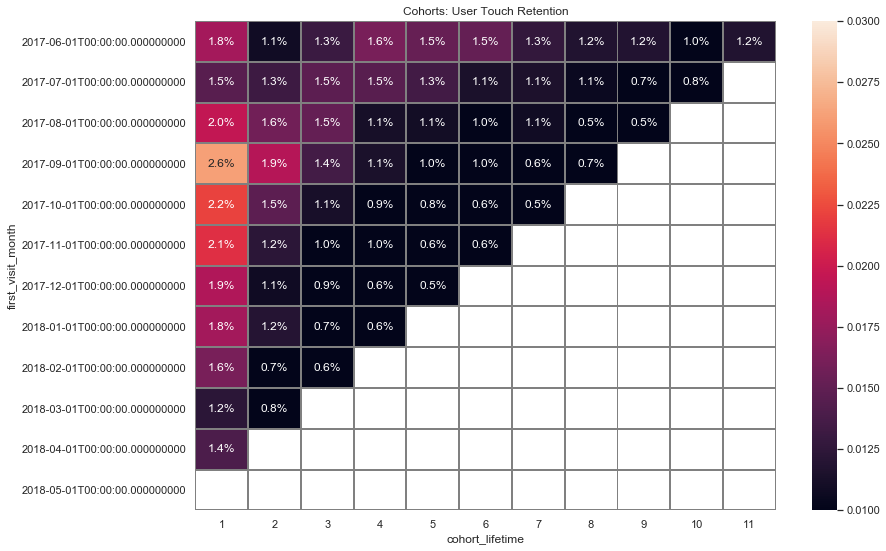

In [32]:
# Переименуем столбец uid в cohort users:
initial_users_count_touch = initial_users_count_touch.rename(columns={'uid':'cohort_users'})
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts_touch = cohorts_touch.merge(initial_users_count,on='first_visit_month')
# Считаем RR:
cohorts_touch['retention'] = cohorts_touch['uid']/cohorts_touch['cohort_users']
# Построим сводную таблицу:
retention_pivot_touch = cohorts_touch.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
# Создадим тепловую карту:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Touch Retention')
sns.heatmap(retention_pivot_touch.drop(columns=[0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0.01, vmax=0.03);

RR для touch очень низкий,а значит пользователей, которые заходят через touch и потом возвращаются снова, очень мало. 

##### Вывод

Узнали сколько людей пользуется сервисом: 
* Количество уникальных пользователей в день: 907
* Количество уникальных пользователей в неделю: 5716
* Количество уникальных пользователей в месяц: 23228

Выяснили, что больше пользователей предпочитает пользоваться сервисом с desktop. Sticky_factors_desktop > sticky_factors_touch пусть и незначительно, это значит что пользователей, пришедших с desktop, сервис удерживает и цепляет лучше. Отметим снижение числа пользователей с 4 месяца по 8-ой, а затем заметный рост пользователей с 10-го месяца.

Больше всего пользователей пришло с source id: 4, 3, 5. Меньше всего: 7, 10, 9. Общая средняя продолжительность сессии 300 сек. В разрезе по device: средняя продолжительность сессии на desktop в два раза выше, чем на touch (360 vs 180). Вполне возможно, что на desktop пользоваться сервисом удобнее или web-версия сервиса не столь интуитивно понятна пользователю, что приходиться тратить больше времени. Сервис не пользуется популярностью, т.к. один пользователь в день проводит чуть больше 1 сессии вне зависимости от device. Пользователи, которые зашли на сервис через 2,1,9 источники, заходили повторно чаще остальных. Дольше всех сессия длится у юзеров пришедших с 1 источника - 600 сек, меньше всего с 7-го. RR низкий, очень малое количество пользователей возвращается обратно. Если сравнивать по device, то пользователи пришедшие с desktop возвращаются чаще.

## Этап IV

### Шаг 1. Когда и сколько раз покупают за период <a id='8-bullet'></a>

In [33]:
# Для удобства выведем первые 10 строк visits_original и orders:
display(visits.head(10), orders.head(10))

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,5,1,2018,3360
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,44,11,2017,60
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,29,7,2017,180
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,45,11,2017,60


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [34]:
# Создадим таблицу с датой первого визита:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit_date'
# Мерджим с таблицей orders:
orders = orders.merge(first_visit, on='uid')
# Выведем рез-т:
orders

,buy_ts,revenue,uid,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00


In [35]:
# Создадим таблицу с датой первой покупки:
first_purchase = orders.groupby('uid')['buy_ts'].min()
first_purchase.name = 'first_purchase_date'
# Мерджим с таблицей orders:
orders = orders.merge(first_purchase, on='uid')
# Выведем рез-т:
orders

,buy_ts,revenue,uid,first_visit_date,first_purchase_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00


In [36]:
# Найдем сколько минут проходит между первым визитом и первой покупкой:
orders['delta'] = (orders['first_purchase_date'] - orders['first_visit_date']).dt.total_seconds() / 60
# Выведем на экран:
orders

,buy_ts,revenue,uid,first_visit_date,first_purchase_date,delta
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,27.0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00,879.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00,45.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00,2.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00,317484.0


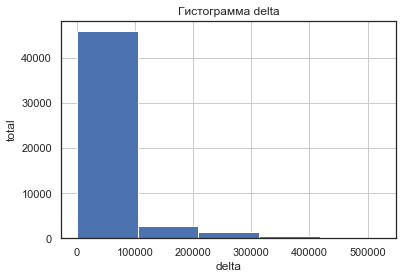

In [37]:
# Построим гистограмму:
orders['delta'].hist(bins=5)
plt.title('Гистограмма delta')
plt.xlabel('delta')
plt.ylabel('total');

In [38]:
# Найдём медиану количества минут до покупки, т.к. она менее подвержена выбросам:
print('Среднее количество минут до покупки:', orders['delta'].median())

Среднее количество минут до покупки: 22.0


In [39]:
# Найдём сколько раз покупают за период (месяц):
orders['month_of_purchase'] = orders['buy_ts'].astype('datetime64[M]')
report = orders.groupby('uid').agg({'month_of_purchase':'count'})
#report = orders.groupby('month_of_purchase').agg({'uid':'count'})
print('В среднем за период один пользователь покупает', report['month_of_purchase'].mean(), 'раз')

В среднем за период один пользователь покупает 1.3803630588943954 раз


In [40]:
# Посчитаем средний чек:
print('Средний чек:', orders['revenue'].mean())

Средний чек: 4.999646930476922


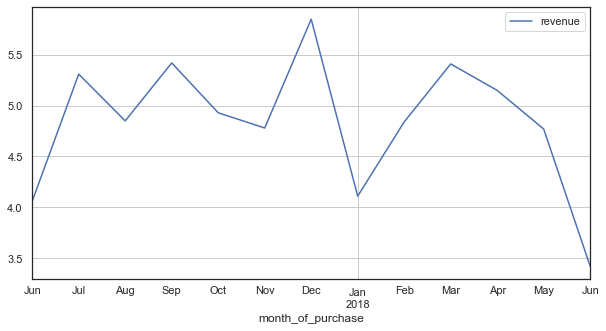

In [41]:
# Найдём средний чек по месяцам и построим график:
revenue = orders.groupby('month_of_purchase').agg({'revenue':'mean'}).round(2)
revenue.plot(figsize=(10, 5), grid=True);

Услуги нашего сервиса довольно неплохо продаются с июля по декабрь, средний чек не падает ниже 4,5. Стоит отметить высокий рост среднего чека с ноября по декабрь, а вот под Новый Год спрос на услуги резко падает. Но после НГ видим положительную динамику и на протяжении двух периодов видно стабильный рост. С марта по июнь вновь идёт уменьшение среднего чека.

### Шаг 2. LTV<a id='9-bullet'></a>

In [42]:
# ltv. Получим месяц первой покупки каждого покупателя:
first_purchase = orders.groupby('uid').agg({'month_of_purchase': 'min'}).reset_index()
first_purchase.columns = ['uid', 'first_purchase_month']
first_purchase

,uid,first_purchase_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [43]:
# Посчитаем количество новых покупателей за каждый месяц:
cohort_sizes = first_purchase.groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']
cohort_sizes

,first_purchase_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [44]:
# Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = pd.merge(orders, first_purchase, on='uid')
orders_new

,buy_ts,revenue,uid,first_visit_date,first_purchase_date,delta,month_of_purchase,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,1.0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,11.0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,2.0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,15.0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,27.0,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00,879.0,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00,45.0,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00,2.0,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00,317484.0,2018-05-01,2018-05-01


In [45]:
# Сгруппируем таблицу orders_new по месяцу первой покупки и месяцу каждой покупки и сложим выручку:
cohorts = orders_new.groupby(['first_purchase_month','month_of_purchase']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_purchase_month,month_of_purchase,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [46]:
# Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_month')
report

,first_purchase_month,n_buyers,month_of_purchase,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [47]:
# LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, 
# а возраст (age) когорты. Добавим столбец age:
report['age'] = (report['month_of_purchase'] - report['first_purchase_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report

,first_purchase_month,n_buyers,month_of_purchase,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [48]:
# ltv
report['ltv'] = report['revenue'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_purchase_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).round(2)
    
output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


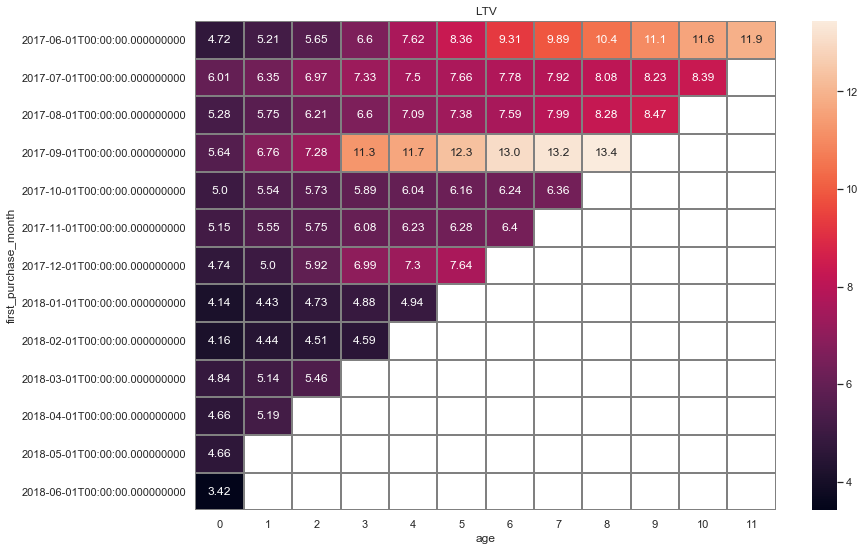

In [49]:
# Создадим тепловую карту:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.3', linewidths=1, linecolor='gray');

In [50]:
# Посчитаем итоговый ltv по когортам:
ltv_total_cohorts = report.groupby('first_purchase_month').agg({'ltv':'sum'}).round(2).sort_values(by='ltv', ascending=False)
ltv_total_cohorts

,ltv
first_purchase_month,
2017-09-01,13.44
2017-06-01,11.88
2017-08-01,8.47
2017-07-01,8.39
2017-12-01,7.64
2017-11-01,6.40
2017-10-01,6.36
2018-03-01,5.46
2018-04-01,5.19


Больше всего денег за lifetime принесли пользователи из сентябрьской, июньской (17-го), августовской и июльской когорт. Меньше всего - из майской, февральской и июньской (18-го)

##### Вывод

Нашли, что:
* Среднее количество минут до покупки: 22
* В среднем за период один пользователь покупает 1.38 раз
* Средний чек: 5.0
___
Узнали, что больше всего денег за lifetime принесли пользователи из сентябрьской, июньской (17-го), августовской и июльской когорт. Меньше всего - из майской, февральской и июньской (18-го)

## Этап V

### Шаг 1. Сколько денег потратили всего / на каждый источник / по времени <a id='10-bullet'></a>

In [51]:
# Найдем сколько всего потратили:
print('Всего потратили денег:', costs['costs'].sum())

Всего потратили денег: 329131.62


In [52]:
# Найдем расходы на маркетинг по месяцам. Создадим в датафрейме costs столбец с месяцами:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
monthly_costs.sort_values(by='costs', ascending=False)

,costs
month,
2017-12-01,38315.35
2017-11-01,37907.88
2017-10-01,36322.88
2018-01-01,33518.52
2018-02-01,32723.03
2018-03-01,30415.27
2017-09-01,24368.91
2018-04-01,22289.38
2018-05-01,22224.27


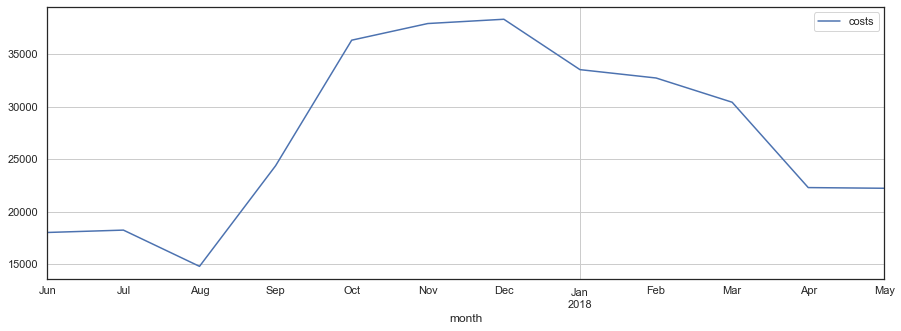

In [53]:
# Построим график:
costs.groupby(['month']).agg({'costs':'sum'}).plot(figsize=(15, 5), grid=True);

In [54]:
# Найдем сколько было потрачено по source id:
costs_source = costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_source

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


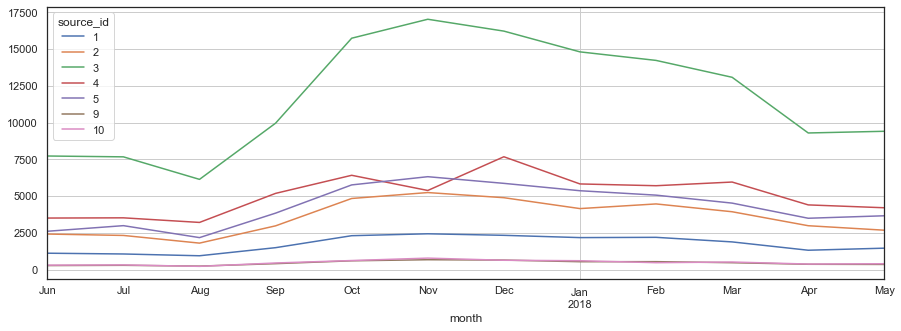

In [55]:
# Построим график, который покажет сколько потрачено на source_id по месяцам:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(15, 5), grid=True);

Всего потрачено: 329131.62. На 3,4,5 источники потрачено больше всего денег, меньше всего на 10 и 9.
Больше всего затрат пришлось на декабрь, ноябрь и октябрь. Меньше всего - июль, июнь (17-го), август.

### Шаг 2. CAC, ROI <a id='11-bullet'></a>

In [56]:
# Мерджим report и monthly_costs:
report_new = pd.merge(report, monthly_costs, left_on='first_purchase_month', right_on='month')

# Считаем cac:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_purchase_month,n_buyers,month_of_purchase,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


In [57]:
# Посчитаем ROMI:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(
        index='first_purchase_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)

output_romi.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


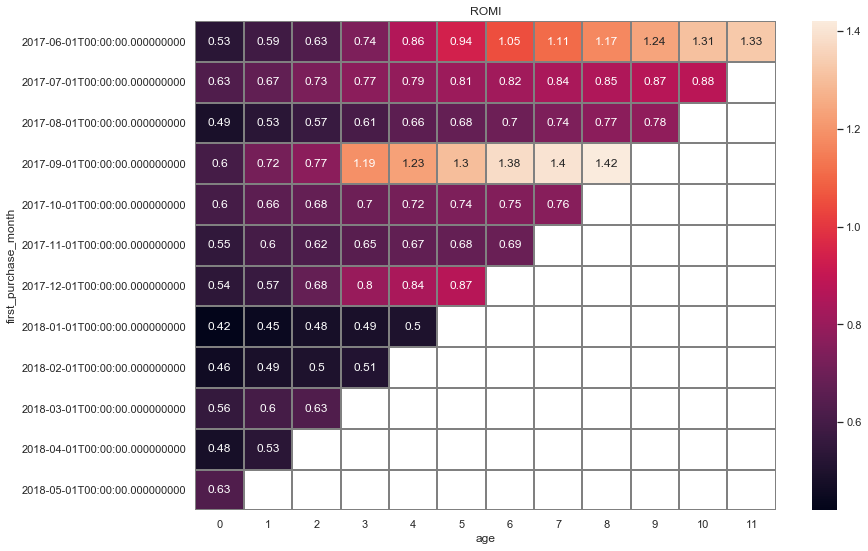

In [58]:
# Создадим тепловую карту:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output_romi, annot=True, fmt='.3', linewidths=1, linecolor='gray');

В итоге у нас окупились две когорты: это июньская (на 7 месяц) и сентябрьская на (на 4 месяц).

Построим таблицу с профилями юзеров, чтобы найти ltv по device и понять что приносит больше денег.

In [59]:
# Переименуем столбец даты таблицы costs:
costs = costs.rename(columns = {'dt':'acqusition_date'})
# Сортируем сессии по времени, находим источник и устройство для первой сессии:
users = (visits.sort_values(by = ['uid', 'start_ts']).groupby('uid')
                .agg({'start_ts': 'first', 'source_id': 'first', 'device': 'first'})
                .rename(columns = {'start_ts' : 'acqusition_ts'}))
users['acqusition_date'] = users['acqusition_ts'].dt.date
users['acqusition_month'] = users['acqusition_ts'].astype('datetime64[M]')
# Считаем стоимость привлечения:
users = (users.reset_index().set_index(['source_id', 'acqusition_date'])
         .join(costs.set_index(['source_id', 'acqusition_date']), how = 'left'))
users

uid       acqusition_ts   device  \
source_id acqusition_date                                                      
1         2017-06-01         469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01         618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01        1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01        1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01        1548840741623289234 2017-06-01 01:18:00  desktop   
...                                         ...                 ...      ...   
10        2018-05-31       17550479715346067160 2018-05-31 22:00:00    touch   
          2018-05-31       17715613363403416471 2018-05-31 03:30:00  desktop   
          2018-05-31       18076428844159112818 2018-05-31 17:47:00    touch   
          2018-05-31       18238279803055794091 2018-05-31 15:52:00    touch   
          2018-05-31       18428797902626915731 2018-05-31 22:10:00  desktop   

                          acqusition_month  costs      month  
source_id acqusition_date                                     
1         2017-06-01            2017-06-01   75.2 2017-06-01  
          2017-06-01            2017-06-01   75.2 2017-06-01  
          2017-06-01            2017-06-01   75.2 2017-06-01  
          2017-06-01            2017-06-01   75.2 2017-06-01  
          2017-06-01            2017-06-01   75.2 2017-06-01  
...                                    ...    ...        ...  
10        2018-05-31            2018-05-01   17.6 2018-05-01  
          2018-05-31            2018-05-01   17.6 2018-05-01  
          2018-05-31            2018-05-01   17.6 2018-05-01  
          2018-05-31            2018-05-01   17.6 2018-05-01  
          2018-05-31            2018-05-01   17.6 2018-05-01  

[228169 rows x 6 columns]

In [60]:
user_cost = (users.groupby(['source_id', 'acqusition_date']).agg({'device':'count', 'costs':'max'})
            .rename(columns = {'device':'users'}))
user_cost['acqusition_cost'] = user_cost['costs'] / user_cost['users']
users = users.join(user_cost[['acqusition_cost']], how='left')
users = users.reset_index().set_index('uid')[['acqusition_ts', 'acqusition_date', 'acqusition_month', 'source_id', 'device',
                                              'acqusition_cost']]
users.head()

,acqusition_ts,acqusition_date,acqusition_month,source_id,device,acqusition_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [61]:
# Найдём ltv по device:
dimensions = ['device']

# Построим когорты:
cohorts_device = (users.groupby(dimensions).agg({'source_id':'count', 'acqusition_cost':'sum'})
                  .rename(columns = {'source_id':'cohort_size'}))
cohorts_device

,cohort_size,acqusition_cost
device,,
desktop,160795,235065.750929
touch,67374,94000.729071


In [62]:
ltv_device = orders.set_index('uid').join(users, how='left')[['acqusition_month', 'source_id', 'device', 
                                                             'month_of_purchase', 'revenue']]
ltv_device['age_month'] = (ltv_device['month_of_purchase'] - ltv_device['acqusition_month']) / np.timedelta64(1, 'M')
ltv_device['age_month'] = ltv_device['age_month'].round().astype('int')
ltv_device = ltv_device.groupby(dimensions + ['age_month']).agg({'revenue':'sum'})
ltv_device = pd.pivot_table(ltv_device, index = dimensions, columns = 'age_month', values ='revenue', aggfunc='sum')
ltv_device = ltv_device.cumsum(axis=1)
ltv_device = cohorts_device[['cohort_size']].join(ltv_device)
ltv_device = ltv_device.div(ltv_device['cohort_size'], axis = 0).drop(columns = ['cohort_size'])
ltv_device

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


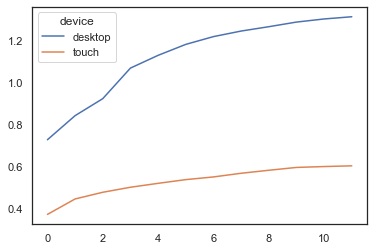

In [63]:
# Построим график:
ltv_device.T.plot();

Очевидно, что пользователи с desktop приносят больше денег.

In [64]:
# Найдём ltv по source_id:
source = ['source_id']

# Построим когорты:
cohorts_source = (users.groupby(source).agg({'source_id':'count', 'acqusition_cost':'sum'})
                  .rename(columns = {'source_id':'cohort_size'}))
cohorts_source

,cohort_size,acqusition_cost
source_id,,
1,9469,20833.27
2,17616,42806.04
3,66116,141321.63
4,72346,61073.60
5,49237,51756.40
6,2,0.00
7,32,0.00
9,6448,5454.42
10,6903,5821.12


In [65]:
ltv_source = orders.set_index('uid').join(users, how='left')[['acqusition_month', 'source_id', 
                                                             'month_of_purchase', 'revenue']]
ltv_source['age_month'] = (ltv_source['month_of_purchase'] - ltv_source['acqusition_month']) / np.timedelta64(1, 'M')
ltv_source['age_month'] = ltv_source['age_month'].round().astype('int')
ltv_source = ltv_source.groupby(source + ['age_month']).agg({'revenue':'sum'})
ltv_source = pd.pivot_table(ltv_source, index = source, columns = 'age_month', values ='revenue', aggfunc='sum')
ltv_source = ltv_source.cumsum(axis=1)
ltv_source = cohorts_source[['cohort_size']].join(ltv_source)
ltv_source = ltv_source.div(ltv_source['cohort_size'], axis = 0).drop(columns = ['cohort_size'])
ltv_source

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


In [66]:
# Найдём сас:
cac_source = (users.groupby('source_id').agg({'acqusition_cost':'sum', 'device':'count'})
                          .rename(columns = {'device':'n_buyers'}))
cac_source['cac'] = cac_source['acqusition_cost'] / cac_source['n_buyers']
cac_source = cac_source[['cac']]
cac_source

,cac
source_id,
1,2.200155
2,2.429952
3,2.137480
4,0.844188
5,1.051169
6,0.000000
7,0.000000
9,0.845909
10,0.843274


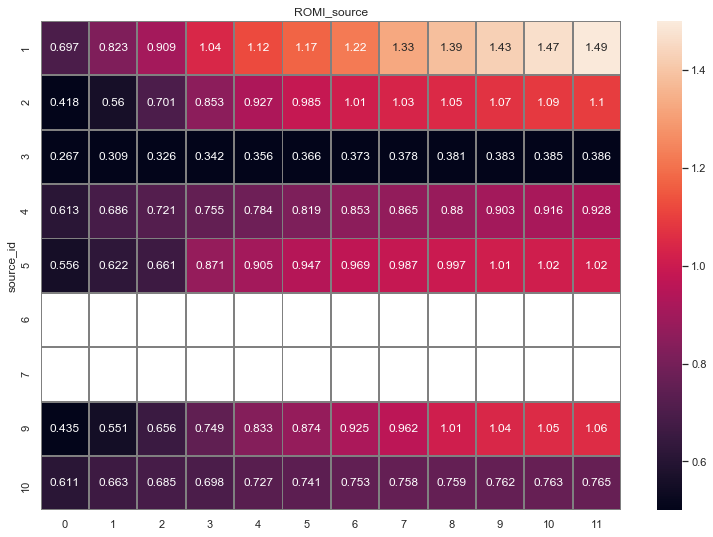

In [67]:
# Мерджим и находим roi:
roi_source = ltv_source.merge(cac_source, on='source_id', how='left')
roi_source = roi_source.div(roi_source['cac'], axis = 0).drop(columns = ['cac'])

# Создадим тепловую карту:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI_source')
sns.heatmap(roi_source, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=0.5, vmax=1.5);

##### Вывод

Всего потрачено: 329131.62. Больше всего денег потратили на 3,4,5 source_id. Больше всего денег было потрачено перед Новым Годом: 10, 11, 12 месяца. Выяснили, что у нас окупились две когорты: это июньская (на 7 месяц) и сентябрьская на (на 4 месяц). В разрезе device пользователи с desktop приносят больше денег. Окупаются 1, 2, 5 и 9 источники, но особенно стоит отметить 1: окупается на 4 месяц и пользователи, пришедшие через него, приносят хороший доход.

## Общий вывод <a id='12-bullet'></a>

Для анализа были представлены три таблицы: visits, orders, costs. Произведена замена типов данных на верный, приведены в порядок названия столбцов, данные проверены на наличие пропусков, дубликатов и ошибок.
___
Определили количество уникальных пользователей в день: 907, количество уникальных пользователей в неделю: 5716, количество уникальных пользователей в месяц: 23228. Выяснили, что уникальных пользователей больше приходит с desktop. Рассчитали sticky_factors: sticky_factors_desktop > sticky_factors_touch пусть и незначительно, это значит что пользователей, пришедших с desktop, сервис удерживает и цепляет лучше. Выделили топ-3 source id по привлеченным клиентам: это 4, 3, 5. Аутсайдеры: 7, 10, 9. В разрезе source id также отметим, что кол-во привлеченных пользователей растет по всем источникам начиная примерно с 8 месяца, а с 4 по 8 месяц число пользователей снижается. 
___
Общая средняя продолжительность сессии 300 сек. В разрезе по device: средняя продолжительность сессии на desktop в два раза выше, чем на touch (360 vs 180). Это может быть связано, вероятно, с тем, что через desktop чаще покупают и времени требуется больше или же с тем, что сервис на destop не столь интуитивно понятен. Сервис не пользуется популярностью, т.к. один пользователь в день проводит чуть больше 1 сессии вне зависимости от device. Пользователи, которые зашли на сервис через 2,1,9 источники, заходили повторно чаще остальных. Дольше всех сессия длится у юзеров пришедших с 1 источника - 600 сек, меньше всего с 7-го. RR низкий, очень малое количество пользователей возвращается обратно. Если сравнивать по device, то пользователи пришедшие с desktop возвращаются чаще.
___
Рассчитали среднее количество минут до покупки: 22.0. Узнали, что в среднем за период покупают 1.38 раз, а средний чек: 5.0. Выяснили, что больше всего денег за lifetime принесли пользователи из сентябрьской, июньской (17-го), августовской и июльской когорт. Меньше всего - из майской, февральской и июньской (18-го).
___
На маркетинг всего потрачено: 329131.62. Больше всего денег потратили на 3,4,5 source_id. Больше всего денег было потрачено перед Новым Годом: 10, 11, 12 месяца. Выяснили, что у нас окупились две когорты: это июньская (на 7 месяц) и сентябрьская на (на 4 месяц). В разрезе device пользователи с desktop приносят больше денег.
___
Маркетологам стоит обратить внимание на платформу desktop, т.к. через нее получается привлечь больше уникальных пользователей, по сравнению с touch, о чём нам говорят dau, wau, mau. Также не стоит забывать о том, что пользователи с desktop ещё и приносят больше денег (ltv). Пользователи пришедшие с desktop липнут и цепляются к сервису лучше, чем с touch, о чем говорит нам sticky_factors. Возвращаются пользователи desktop чаще, чем touch - выяснили с помощью RR. Что же касается источников привлечения, то здесь я бы выделил особеноо 1-ый. Он окупается на 4 месяц и пользователи, пришедшие через него, приносят хороший доход.